# pitch

In [2]:
from music21 import pitch


# Create a pitch
p = pitch.Pitch('C4')
print("nameWithOctave",p.nameWithOctave) # C4
print("midi", p.midi) # 60


# Transpose pitch
p.transpose("P5", inPlace=True) # Perfect fifth up
print("transpose7", p.nameWithOctave) # G4

nameWithOctave C4
midi 60
transpose7 G4


In [3]:
from music21 import pitch


# Create a pitch
p = pitch.Pitch('C4')
print("nameWithOctave",p.nameWithOctave) # C4
print("midi", p.midi) # 60


# Transpose pitch using semitones - 7 semitones is a P5
p.transpose(7, inPlace=True) # Perfect fifth up
print("transpose7", p.nameWithOctave) # G4

nameWithOctave C4
midi 60
transpose7 G4


## Note

In [4]:
from music21 import note


# Create a note
n = note.Note('E4')
n.duration.quarterLength = 1.5
n.volume.velocity = 90 # MIDI velocity  - normal, medium attack == 60


print(n.pitch.nameWithOctave) # E4
print(n.duration.quarterLength) # 1.5

E4
1.5


## Chord

['C5', 'E5', 'G5']


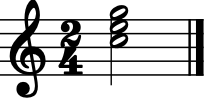

In [5]:
from music21 import chord


# Create a chord
c = chord.Chord(['C4', 'E4', 'G4'])
c.duration.quarterLength = 2


# Transpose chord up an octave
c.transpose(12, inPlace=True)
print([p.nameWithOctave for p in c.pitches]) # ['C5','E5','G5']

c.show()

## Stream and Part

<music21.note.Note C> 1.0
<music21.note.Note D> 1.0
<music21.chord.Chord E4 G4> 2.0


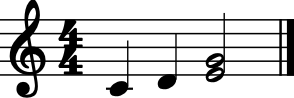

In [6]:
from music21 import stream, instrument

# Create a part (MIDI track)
p = stream.Part()
p.append(instrument.EnglishHorn())


# Add notes
p.append(note.Note('C4', quarterLength=1))
p.append(note.Note('D4', quarterLength=1))
p.append(chord.Chord(['E4','G4'], quarterLength=2))


# View contents
for n in p.notes:
    print(n, n.duration.quarterLength)

p.show('midi')
p.show()

## midi output


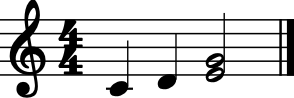

write to file


'english-horn.mid'

In [7]:
from music21 import tempo, midi

p = stream.Part()
p.append(instrument.EnglishHorn())

# Add notes
p.append(note.Note('C4', quarterLength=1))
p.append(note.Note('D4', quarterLength=1))
p.append(chord.Chord(['E4','G4'], quarterLength=2))
p.show()

print("write to file")
p.write('midi', fp='english-horn.mid')

## midi event inspection

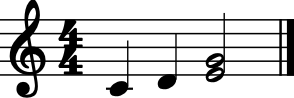


----- Tracks summary ----
[<music21.midi.MidiTrack 0 -- 6 events>, <music21.midi.MidiTrack 1 -- 26 events>]

------ Iterate events  ----
Track 0
   <music21.midi.DeltaTime (empty) track=0>
   <music21.midi.MidiEvent SET_TEMPO, track=0, data=b'\x07\xa1 '>
   <music21.midi.DeltaTime (empty) track=0>
   <music21.midi.MidiEvent TIME_SIGNATURE, track=0, data=b'\x04\x02\x18\x08'>
   <music21.midi.DeltaTime t=10080, track=0>
   <music21.midi.MidiEvent END_OF_TRACK, track=0, data=b''>
Track 1
   <music21.midi.DeltaTime (empty) track=1>
   <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=1, data=b'English Horn'>
   <music21.midi.DeltaTime (empty) track=1>
   <music21.midi.MidiEvent PROGRAM_CHANGE, track=1, channel=1, data=69>
   <music21.midi.DeltaTime (empty) track=1>
   <music21.midi.MidiEvent PITCH_BEND, track=1, channel=1, parameter1=0, parameter2=64>
   <music21.midi.DeltaTime (empty) track=1>
   <music21.midi.MidiEvent PROGRAM_CHANGE, track=1, channel=1, data=69>
   <music21.midi.Delta

In [8]:
from music21 import tempo, midi

p = stream.Part()
p.append(instrument.EnglishHorn())  # <music21.midi.MidiEvent PROGRAM_CHANGE, track=1, channel=1, data=69> 69 is English Horn

# Add notes
p.append(note.Note('C4', quarterLength=1))
p.append(note.Note('D4', quarterLength=1))
p.append(chord.Chord(['E4','G4'], quarterLength=2))
p.show()

mf = midi.translate.streamToMidiFile(p)

print("\n----- Tracks summary ----")
print(mf.tracks)

print("\n------ Iterate events  ----")
for i, track in enumerate(mf.tracks):
    print(f"Track {i}")
    for event in track.events:
        print("  ", event)

## tempo
set tempo to 120 BPM and inspect in midi


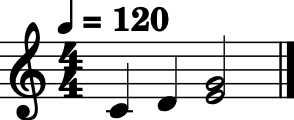

Track 0
   <music21.midi.DeltaTime (empty) track=0>
   <music21.midi.MidiEvent SET_TEMPO, track=0, data=b'\x07\xa1 '>
   <music21.midi.DeltaTime (empty) track=0>
   <music21.midi.MidiEvent TIME_SIGNATURE, track=0, data=b'\x04\x02\x18\x08'>
   <music21.midi.DeltaTime t=10080, track=0>
   <music21.midi.MidiEvent END_OF_TRACK, track=0, data=b''>
Track 1
   <music21.midi.DeltaTime (empty) track=1>
   <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=1, data=b'English Horn'>
   <music21.midi.DeltaTime (empty) track=1>
   <music21.midi.MidiEvent PROGRAM_CHANGE, track=1, channel=1, data=69>
   <music21.midi.DeltaTime (empty) track=1>
   <music21.midi.MidiEvent PITCH_BEND, track=1, channel=1, parameter1=0, parameter2=64>
   <music21.midi.DeltaTime (empty) track=1>
   <music21.midi.MidiEvent PROGRAM_CHANGE, track=1, channel=1, data=69>
   <music21.midi.DeltaTime (empty) track=1>
   <music21.midi.MidiEvent NOTE_ON, track=1, channel=1, pitch=60, velocity=90>
   <music21.midi.DeltaTime t=10080, t

In [9]:
# tempo
from music21 import tempo, midi

# Create a tempo
t = tempo.MetronomeMark(number=120)
p.insert(0, t)
p.show()

mf = midi.translate.streamToMidiFile(p)

for i, track in enumerate(mf.tracks):
    print(f"Track {i}")
    for event in track.events:
        print("  ", event)

# Transformations

## Transposition
we can always use the octave to set to a different octave, use transpose to set to a different interval


--- C major ---


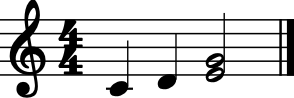


--- Perfect fifth ---


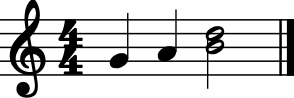

In [10]:
# Create an EnglishHorn Part (
p = stream.Part()

# Add notes
p.append(instrument.EnglishHorn())  # <music21.midi.MidiEvent PROGRAM_CHANGE, track=1, channel=1, data=69> 69 is English Horn
p.append(note.Note('C4', quarterLength=1))
p.append(note.Note('D4', quarterLength=1))
p.append(chord.Chord(['E4','G4'], quarterLength=2))

# add part to a new Score
s = stream.Score()
s.append(p)
print("\n--- C major ---")
s.show()
s.show('midi')

# transpose to a perfect fifth
s.transpose('P5', inPlace=True)  # Transpose entire score up a perfect fifth
print("\n--- Perfect fifth ---")
s.show()
s.show('midi')

## iteration and getElementsByClass
we can always cycle through all notes to change the property of the notes (such as velocity)

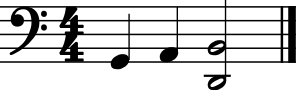

In [22]:
from music21 import note, chord

for n in s.recurse().getElementsByClass((note.Note, chord.Chord)):
    if isinstance(n, chord.Chord):
        for pitch in n.pitches:
            pitch.octave = 2
        n.volume.velocity = 100
    else:
        n.octave = 2
        n.volume.velocity = 100


s.show()
s.show('midi')

## Quantizatoin

In [28]:
from music21 import note, chord

def print_offsets(label, stream_obj):
    print(label)
    for el in stream_obj.recurse().getElementsByClass((note.Note, chord.Chord)):
        print(f"{el!r} @ offset {el.offset}, qLen {el.duration.quarterLength}")

print_offsets("Before quantize", s)
s.quantize([1.5])
print_offsets("After quantize", s)

Before quantize
<music21.note.Note G> @ offset 0.0, qLen 1.0
<music21.note.Note A> @ offset 1.0, qLen 1.0
<music21.chord.Chord B2 D2> @ offset 2.0, qLen 2.0
After quantize
<music21.note.Note G> @ offset 0.0, qLen 1.0
<music21.note.Note A> @ offset 1.0, qLen 1.0
<music21.chord.Chord B2 D2> @ offset 2.0, qLen 2.0
